<a href="https://colab.research.google.com/github/hasmitha005/OIBSIP/blob/main/Project_4_Proposal_level_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import libraries
from google.colab import files
import pandas as pd
import io

# Step 2: Upload file (upload the user_reviews file when prompted)
uploaded = files.upload()

# Step 3: Automatically detect and read the uploaded file
filename = list(uploaded.keys())[0]   # get the first uploaded file name automatically
print(f"✅ Uploaded file detected: {filename}")

# Step 4: Read CSV into DataFrame
df = pd.read_csv(io.BytesIO(uploaded[filename]))

# Step 5: Display dataset info
print("✅ File loaded successfully!")
print("Shape:", df.shape)
df.head()


Saving user_reviews.csv to user_reviews (4).csv
✅ Uploaded file detected: user_reviews (4).csv
✅ File loaded successfully!
Shape: (64295, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# Step 2A: Info about dataset
print("Dataset Info:")
print(df.info())

# Step 2B: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Step 2C: Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df.describe())

# Step 2D: Unique sentiment values
print("\nUnique sentiment labels:", df['Sentiment'].unique())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None

Missing Values:
 App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

Summary Statistics:
       Sentiment_Polarity  Sentiment_Subjectivity
count        37432.000000            37432.000000
mean             0.182146                0.492704
std              0.351301                0.259949
min             -1.000000             

In [ ]:
# Remove rows with missing sentiment or review text
df = df.dropna(subset=['Sentiment', 'Translated_Review'])
df = df.reset_index(drop=True)
print("✅ After cleaning, shape:", df.shape)

# Verify cleaning
df.isnull().sum()


✅ After cleaning, shape: (37427, 5)


,0
App,0
Translated_Review,0
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0


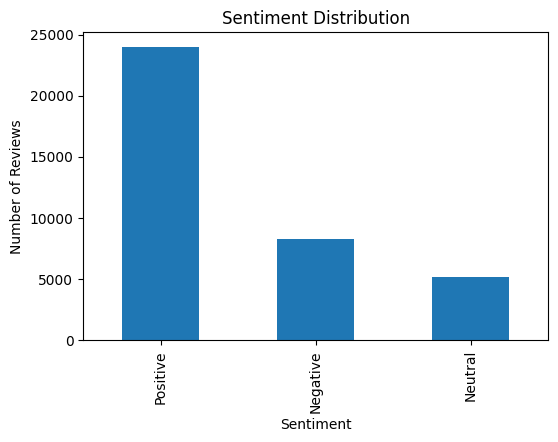

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts()
plt.figure(figsize=(6,4))
sentiment_counts.plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


In [ ]:
# Calculate mean polarity & subjectivity for each sentiment
avg_scores = df.groupby('Sentiment')[['Sentiment_Polarity', 'Sentiment_Subjectivity']].mean()
print("Average Polarity & Subjectivity by Sentiment:\n")
print(avg_scores)


Average Polarity & Subjectivity by Sentiment:

           Sentiment_Polarity  Sentiment_Subjectivity
Sentiment                                            
Negative            -0.256173                0.535087
Neutral              0.000000                0.079786
Positive             0.372402                0.566949


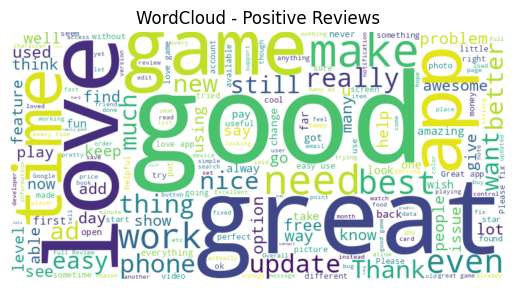

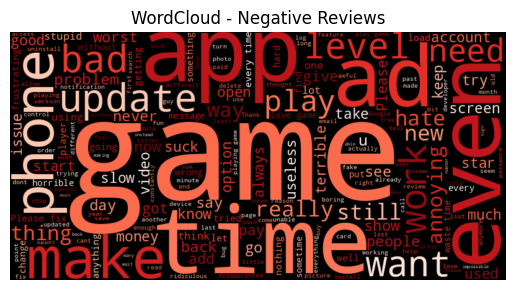

In [ ]:
from wordcloud import WordCloud

# Positive Reviews
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Translated_Review'].dropna())
wc_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Positive Reviews")
plt.show()

# Negative Reviews
negative_text = " ".join(df[df['Sentiment'] == 'Negative']['Translated_Review'].dropna())
wc_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Negative Reviews")
plt.show()
